In [2]:
import cirq
import math
from cirq import Simulator
from matplotlib import pyplot as plt

In [3]:
# Initialising a One Dimensional Qubit
qbitx = cirq.LineQubit(0)

# Degree of Rotation in the X - Axis
rotx_degree = cirq.rx((math.pi) / 1800)

# Storing the Probabilities
p = []

# Each Degree incremented with 0.1 so that gives us 180*10 + 1 [0.0 angle]
counter = 1801

#Simulations
sim = 1000

In [4]:
for i in range(counter):
	circuit = cirq.Circuit()
	for _ in range(i):
		circuit.append(rotx_degree(qbitx))
	circuit.append(cirq.measure(qbitx))
	simulator = Simulator()
	result = simulator.run(circuit, repetitions=sim)
	prob = result.histogram(key='0')[0]/sim
	p.append(prob)
	if i%50 == 0:
		print(f"Total rotation: {i/10} degrees \t Probability {prob}")

Total rotation: 0.0 degrees 	 Probability 1.0
Total rotation: 5.0 degrees 	 Probability 0.999
Total rotation: 10.0 degrees 	 Probability 0.99
Total rotation: 15.0 degrees 	 Probability 0.99
Total rotation: 20.0 degrees 	 Probability 0.966
Total rotation: 25.0 degrees 	 Probability 0.953
Total rotation: 30.0 degrees 	 Probability 0.934
Total rotation: 35.0 degrees 	 Probability 0.902
Total rotation: 40.0 degrees 	 Probability 0.897
Total rotation: 45.0 degrees 	 Probability 0.871
Total rotation: 50.0 degrees 	 Probability 0.843
Total rotation: 55.0 degrees 	 Probability 0.786
Total rotation: 60.0 degrees 	 Probability 0.77
Total rotation: 65.0 degrees 	 Probability 0.724
Total rotation: 70.0 degrees 	 Probability 0.676
Total rotation: 75.0 degrees 	 Probability 0.616
Total rotation: 80.0 degrees 	 Probability 0.557
Total rotation: 85.0 degrees 	 Probability 0.558
Total rotation: 90.0 degrees 	 Probability 0.524
Total rotation: 95.0 degrees 	 Probability 0.451
Total rotation: 100.0 degre

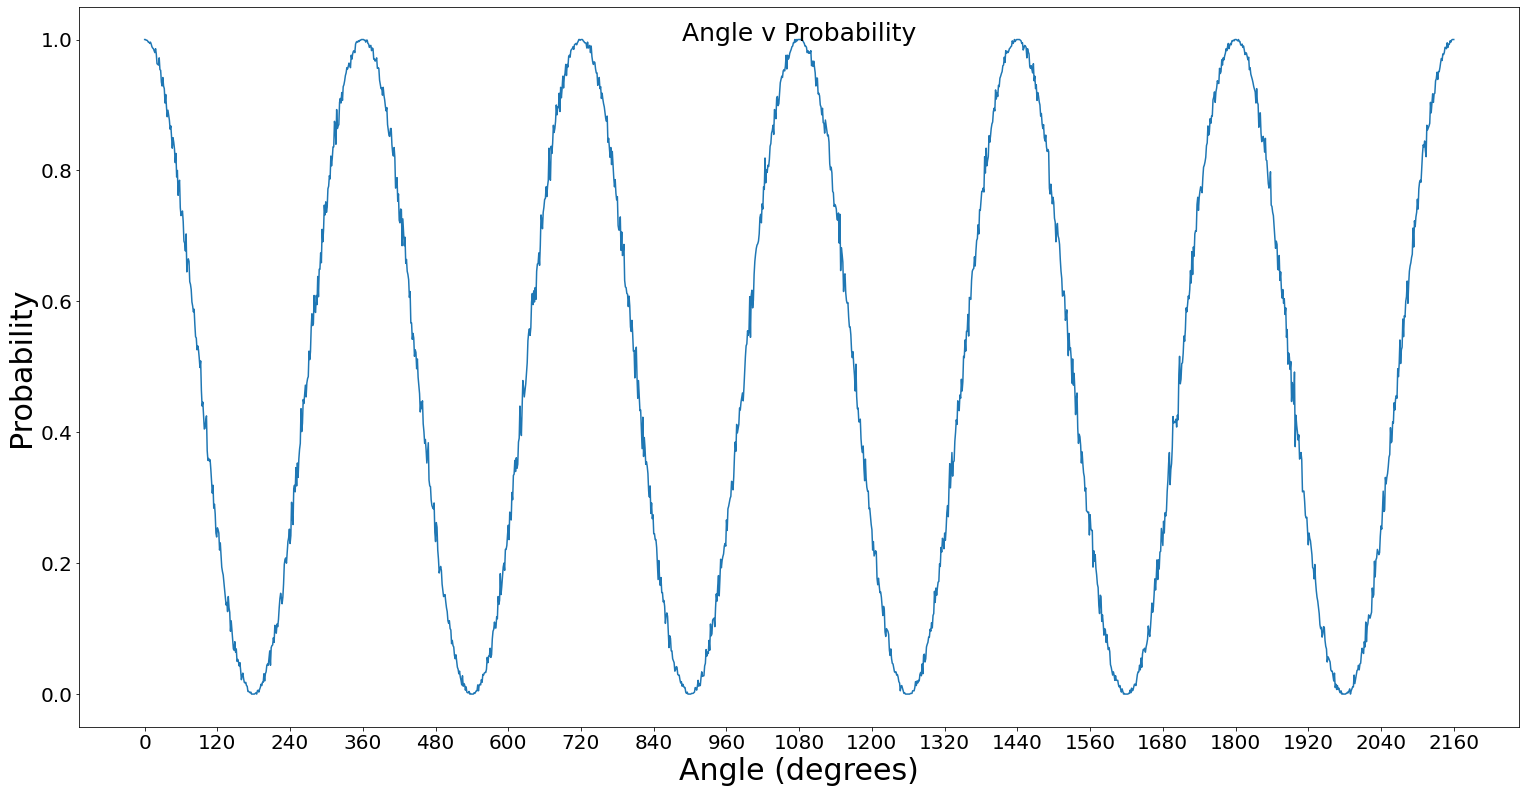

In [6]:
fig = plt.figure(figsize=(20,10))
fig.suptitle('Angle v Probability', fontsize=25)
probability = fig.add_axes([0, 0, 1, 1])

labels = [round(0.1*x) for x in range(0, counter, 100)]
x_pos = [x for x in range(0,counter,100)]
probability.plot(p)

probability.set_xticks(x_pos)
probability.set_xticklabels(labels)
probability.set_xlabel('Angle (degrees)', fontsize=30)
probability.set_ylabel('Probability', fontsize=30)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.show()